In [47]:
%pip install scikit-learn

You should consider upgrading via the '/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
student_performance_df = pd.read_csv('student_performance.csv')
student_performance_df.head()
student_performance_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

In [50]:
student_performance_df.isnull().sum()


StudyHours              0
Attendance              0
Resources               0
Extracurricular         0
Motivation              0
Internet                0
Gender                  0
Age                     0
LearningStyle           0
OnlineCourses           0
Discussions             0
AssignmentCompletion    0
ExamScore               0
EduTech                 0
StressLevel             0
FinalGrade              0
dtype: int64

In [51]:
student_performance_df

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13998,30,62,0,1,1,1,0,22,2,2,1,100,71,1,2,1
13999,30,62,0,1,1,1,0,23,3,12,1,72,55,1,1,2
14000,22,90,2,0,1,1,0,23,3,0,1,80,56,0,0,2
14001,22,90,2,0,1,1,0,29,2,16,0,50,62,1,2,2


In [52]:
# Create readable labels for learning styles
learning_style_names = {
    0: 'Visual',
    1: 'Auditory', 
    2: 'Kinesthetic',
    3: 'Reading/Writing'
}

student_performance_df['LearningStyleName'] = student_performance_df['LearningStyle'].map(learning_style_names)

print("\nLearning Style Distribution:")
print(student_performance_df['LearningStyleName'].value_counts())
print(f"\nExamScore range: {student_performance_df['ExamScore'].min()} to {student_performance_df['ExamScore'].max()}")
print(f"StudyHours range: {student_performance_df['StudyHours'].min()} to {student_performance_df['StudyHours'].max()}")



Learning Style Distribution:
LearningStyleName
Auditory           3580
Reading/Writing    3547
Kinesthetic        3500
Visual             3376
Name: count, dtype: int64

ExamScore range: 40 to 100
StudyHours range: 5 to 44



--- Analyzing Visual Learners ---
Number of students: 3376
Equation: Score = 68.7 + 0.04 × Hours
R² = 0.000
Meaning: Each extra hour → 0.04 point increase

--- Analyzing Auditory Learners ---
Number of students: 3580
Equation: Score = 72.6 + -0.09 × Hours
R² = 0.001
Meaning: Each extra hour → -0.09 point increase

--- Analyzing Kinesthetic Learners ---
Number of students: 3500
Equation: Score = 70.3 + 0.01 × Hours
R² = 0.000
Meaning: Each extra hour → 0.01 point increase

--- Analyzing Reading/Writing Learners ---
Number of students: 3547
Equation: Score = 68.6 + 0.09 × Hours
R² = 0.001
Meaning: Each extra hour → 0.09 point increase


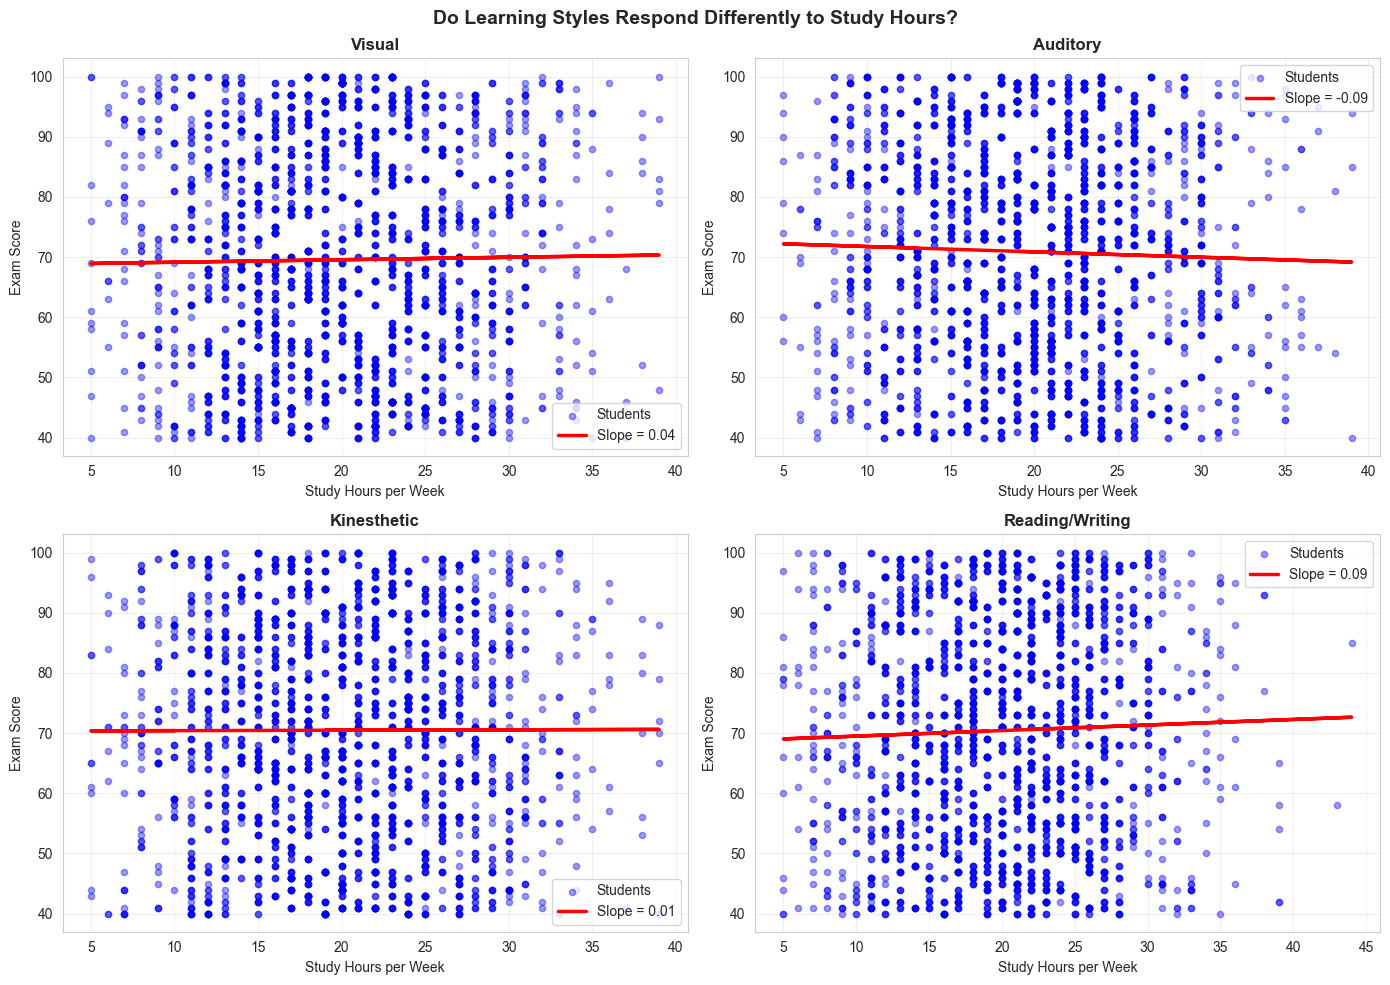

In [ ]:
# QUESTION 1: Do different learning styles show different slopes?


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Do Learning Styles Respond Differently to Study Hours?', fontsize=14, fontweight='bold')


axes = axes.flatten()


slope_results = {}
rmse_results = {}

# Look at each learning style one by one
for i, (style_number, style_name) in enumerate(learning_style_names.items()):
    
    print(f"\n--- Analyzing {style_name} Learners ---")
    
    # Get only the students with this learning style
    students_this_style = student_performance_df[student_performance_df['LearningStyle'] == style_number]
    
    # Get the X (study hours) and y (exam scores)
    X = students_this_style[['StudyHours']].values
    y = students_this_style['ExamScore'].values
    
    print(f"Number of students: {len(students_this_style)}")
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Train the model (find the best line)
    model.fit(X, y)
    
    # Get predictions
    y_predicted = model.predict(X)
    
    #  Get the slope and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    #  Calculate how good the model is (R-squared)
    r_squared = r2_score(y, y_predicted)
    rmse = np.sqrt(mean_squared_error(y, y_predicted))
    
    # Save results
    slope_results[style_name] = slope
    rmse_results[style_name] = rmse
    

    print(f"Equation: Score = {intercept:.1f} + {slope:.2f} × Hours")
    print(f"R² = {r_squared:.3f}")
    print(f"Meaning: Each extra hour → {slope:.2f} point increase")
    
    # STEP 8: Draw the graph
    ax = axes[i]
    
    # Plot the actual data points
    ax.scatter(X, y, alpha=0.4, s=20, color='blue', label='Students')
    
    # Plot the regression line
    ax.plot(X, y_predicted, color='red', linewidth=2.5, label=f'Slope = {slope:.2f}')
    
    # Labels and title
    ax.set_xlabel('Study Hours per Week', fontsize=10)
    ax.set_ylabel('Exam Score', fontsize=10)
    ax.set_title(f'{style_name}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
# Show the graph
plt.tight_layout()
plt.savefig('slopes_by_learning_style.png', dpi=150)
plt.show()


In [ ]:
# QUESTION 2: Do different learning styles need different strategies?

# Testing specific features for different learning styles
factors = ['StudyHours', 'Attendance', 'AssignmentCompletion', 'OnlineCourses', 'Discussions']


strategy_results = {}




--- Visual Learners ---
What matters most:
  1. Discussions: -0.65 (hurts)
  2. Attendance: -0.08 (hurts)
  3. OnlineCourses: +0.08 (helps)
  4. AssignmentCompletion: +0.05 (helps)
  5. StudyHours: +0.04 (helps)

--- Auditory Learners ---
What matters most:
  1. Discussions: -2.80 (hurts)
  2. StudyHours: -0.08 (hurts)
  3. OnlineCourses: +0.05 (helps)
  4. Attendance: -0.02 (hurts)
  5. AssignmentCompletion: +0.01 (helps)

--- Kinesthetic Learners ---
What matters most:
  1. Discussions: -0.25 (hurts)
  2. OnlineCourses: +0.07 (helps)
  3. AssignmentCompletion: +0.02 (helps)
  4. Attendance: +0.02 (helps)
  5. StudyHours: +0.01 (helps)

--- Reading/Writing Learners ---
What matters most:
  1. Discussions: -0.58 (hurts)
  2. StudyHours: +0.09 (helps)
  3. AssignmentCompletion: +0.04 (helps)
  4. OnlineCourses: +0.03 (helps)
  5. Attendance: -0.00 (hurts)


<Figure size 1200x600 with 0 Axes>

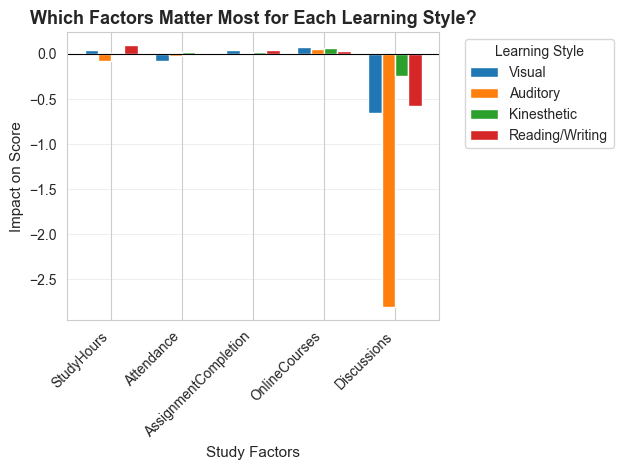

In [ ]:
# Check each learning style
for style_number, style_name in learning_style_names.items():
    
    print(f"\n--- {style_name} Learners ---")
    
    # Get students with this style (using the number, not the name)
    students = student_performance_df[student_performance_df['LearningStyle'] == style_number]
    
    # Check if we have any students with this style
    if len(students) == 0:
        print(f"  ⚠️  No students found with this learning style - skipping")
        continue
    
    # Get the X variables (all factors) and y (exam score)
    X = students[factors]
    y = students['ExamScore']
    
    # Create and train model
    model = LinearRegression()
    model.fit(X, y)
    
    # Get coefficients (how much each factor matters)
    coefficients = model.coef_
    
    # Store results
    strategy_results[style_name] = dict(zip(factors, coefficients))
    
    # Sort by importance (absolute value)
    factor_importance = sorted(zip(factors, coefficients), key=lambda x: abs(x[1]), reverse=True)
    
    print("What matters most:")
    for rank, (factor, coef) in enumerate(factor_importance, 1):
        direction = "helps" if coef > 0 else "hurts"
        print(f"  {rank}. {factor}: {coef:+.2f} ({direction})")


plt.figure(figsize=(12, 6))


strategy_df = pd.DataFrame(strategy_results)


strategy_df.plot(kind='bar', width=0.75)
plt.title('Which Factors Matter Most for Each Learning Style?', fontsize=13, fontweight='bold')
plt.xlabel('Study Factors', fontsize=11)
plt.ylabel('Impact on Score', fontsize=11)
plt.legend(title='Learning Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('strategies_by_learning_style.png', dpi=150)
plt.show()


Features used: ['StudyHours', 'Attendance', 'Motivation', 'StressLevel', 'AssignmentCompletion', 'OnlineCourses', 'Discussions', 'LearningStyle']
Target variable: FinalGrade (values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)])
Grade meaning: 0=A, 1=B, 2=C, 3=D/F

Data split:
Training set: 9802 students
Testing set: 4201 students

 MODEL PERFORMANCE:
Accuracy: 0.905 (90.5%)

 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           A       0.89      0.92      0.91      1179
           B       0.90      0.90      0.90       956
           C       0.91      0.90      0.91      1091
         D/F       0.92      0.89      0.91       975

    accuracy                           0.91      4201
   macro avg       0.91      0.90      0.90      4201
weighted avg       0.91      0.91      0.91      4201


 FEATURE IMPORTANCE (What matters most for grades):
  AssignmentCompletion: 0.218
  Attendance: 0.210
  StudyHours: 0.190
  OnlineCourses: 0.186

/var/folders/k_/1nnjx3r16776q9t5yv40m8jh0000gn/T/ipykernel_2973/2220177498.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')


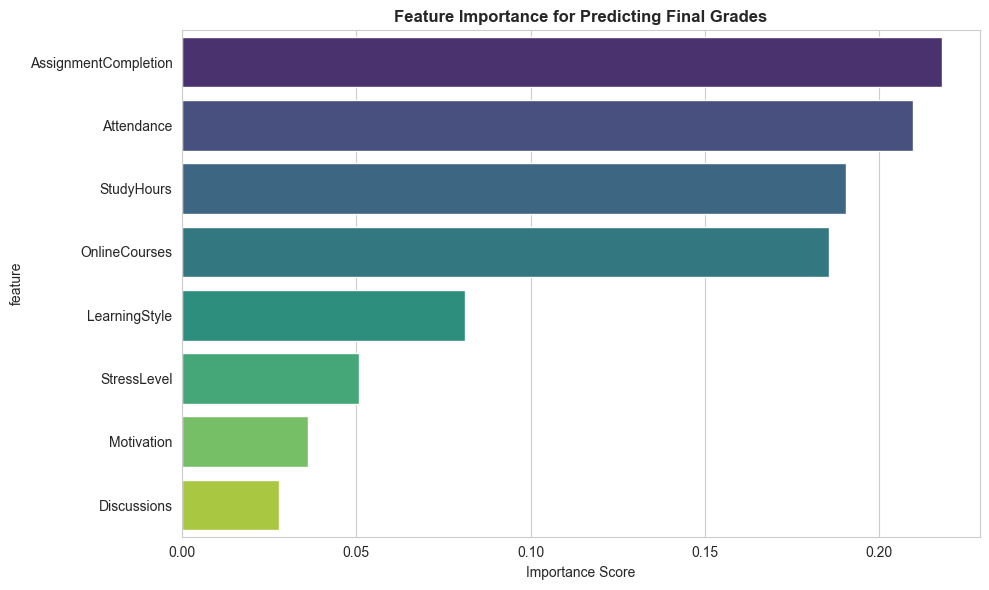

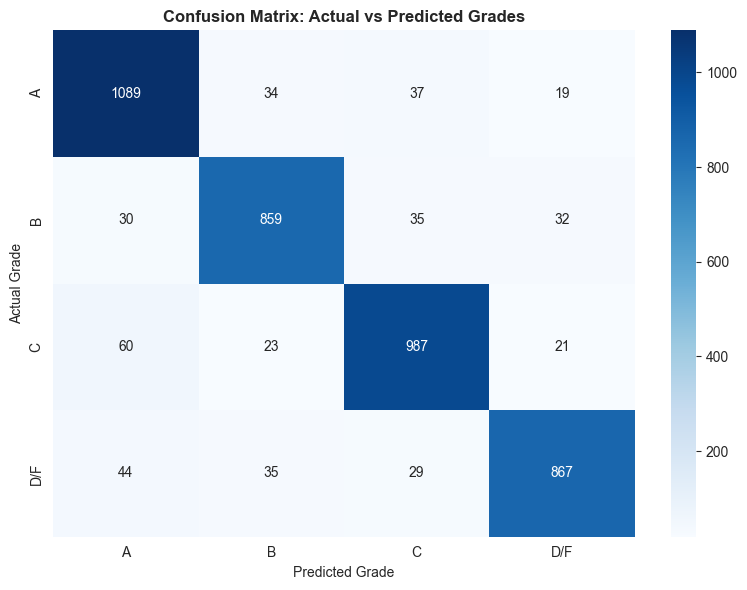


 PERFORMANCE BY LEARNING STYLE:
  Visual: 0.900 (1042 students)
  Auditory: 0.929 (1091 students)
  Kinesthetic: 0.895 (1062 students)
  Reading/Writing: 0.896 (1006 students)


In [ ]:
# Experiment 2  

# Prepare features and target
feature_columns = ['StudyHours', 'Attendance', 'Motivation', 'StressLevel', 'AssignmentCompletion', 'OnlineCourses', 'Discussions', 'LearningStyle']

X = student_performance_df[feature_columns]
y = student_performance_df['FinalGrade']  # This is categorical (0,1,2,3)

print(f"Features used: {feature_columns}")
print(f"Target variable: FinalGrade (values: {sorted(y.unique())})")
print(f"Grade meaning: 0=A, 1=B, 2=C, 3=D/F")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nData split:")
print(f"Training set: {X_train.shape[0]} students")
print(f"Testing set: {X_test.shape[0]} students")

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n MODEL PERFORMANCE:")
print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

print("\n DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['A', 'B', 'C', 'D/F']))

# Feature importance analysis
print("\n FEATURE IMPORTANCE (What matters most for grades):")
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, row in feature_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")


plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Predicting Final Grades', fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance_grades.png', dpi=150)
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['A', 'B', 'C', 'D/F'], 
            yticklabels=['A', 'B', 'C', 'D/F'])
plt.title('Confusion Matrix: Actual vs Predicted Grades', fontweight='bold')
plt.ylabel('Actual Grade')
plt.xlabel('Predicted Grade')
plt.tight_layout()
plt.savefig('confusion_matrix_grades.png', dpi=150)
plt.show()

# Analyze performance by learning style
print("\n PERFORMANCE BY LEARNING STYLE:")
for style_num, style_name in learning_style_names.items():
    # Get test students with this learning style
    style_mask = X_test['LearningStyle'] == style_num
    if style_mask.sum() > 0:  # If there are students with this style in test set
        style_accuracy = accuracy_score(y_test[style_mask], y_pred[style_mask])
        print(f"  {style_name}: {style_accuracy:.3f} ({style_mask.sum()} students)")

EXPERIMENT 3: Discovering Student Patterns with Clustering
Features for clustering: ['StudyHours', 'Attendance', 'Motivation', 'StressLevel', 'AssignmentCompletion', 'ExamScore', 'FinalGrade']

🔍 Finding optimal number of clusters...


/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:2

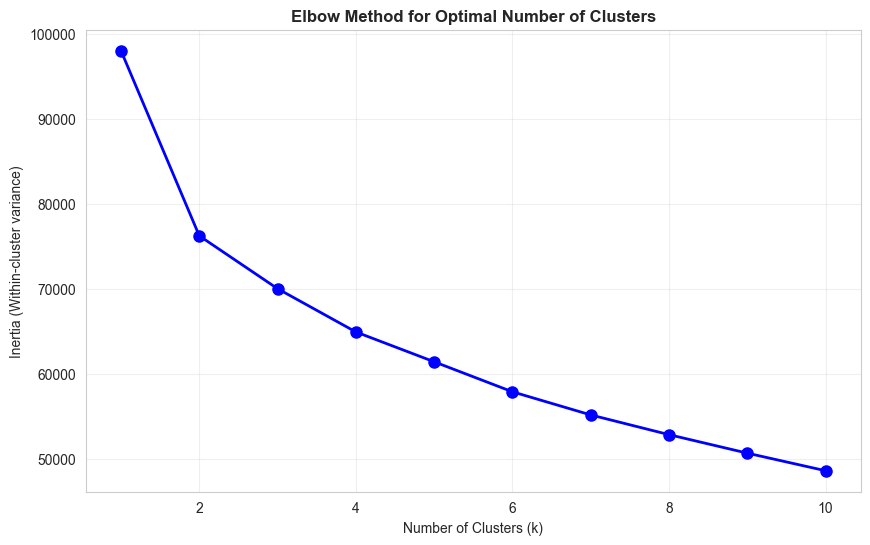

Choosing 4 clusters based on elbow method

📊 CLUSTER ANALYSIS (Student Risk Groups):
Total students in each cluster:
Cluster
0    3525
1    3573
2    3336
3    3569
Name: count, dtype: int64

📈 CLUSTER PROFILES (Average values):
         StudyHours  Attendance  Motivation  StressLevel  \
Cluster                                                    
0             19.99       79.90        0.92         2.00   
1             20.00       80.10        0.89         2.00   
2             19.89       80.49        0.90         0.62   
3             20.06       80.30        0.91         0.56   

         AssignmentCompletion  ExamScore  FinalGrade  
Cluster                                               
0                       74.31      54.71        2.48  
1                       75.21      85.24        0.47  
2                       74.12      54.71        2.47  
3                       74.33      85.50        0.46  


/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/shreeyatadisina/Documents/3135work/shreeyatadisina.github.io/ITCS3162/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:2

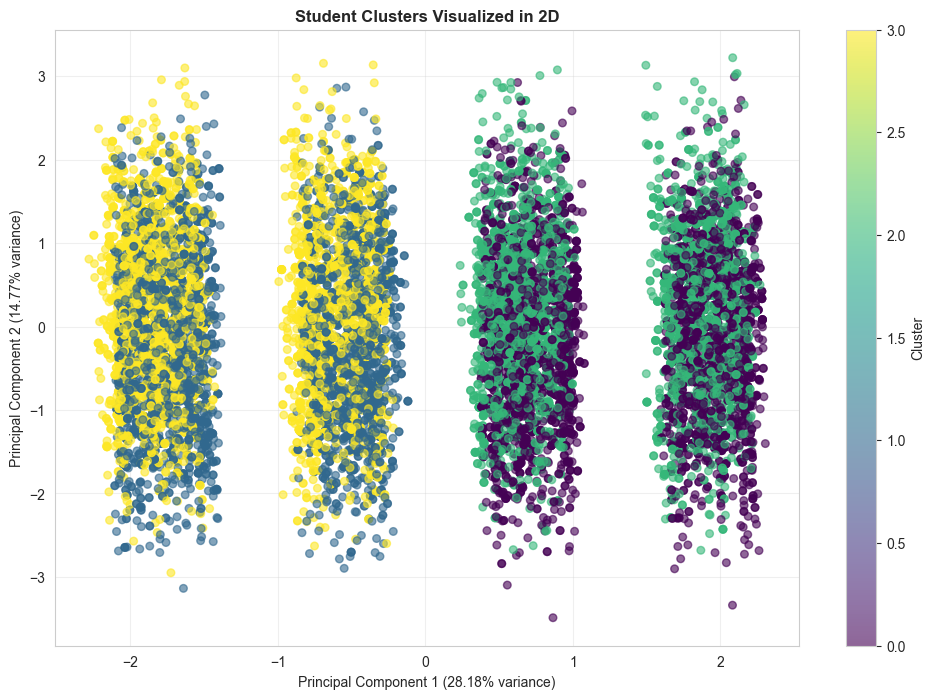


🎯 INTERPRETING CLUSTERS (Student Risk Groups):

Cluster 0 (Medium-Low Risk):
  - AVERAGE PERFORMERS
  - Students: 3525
  - Avg Exam Score: 54.7
  - Avg Study Hours: 20.0
  - Avg Motivation: 0.9
  - Avg Stress: 2.0

Cluster 1 (Medium-Low Risk):
  - AVERAGE PERFORMERS
  - Students: 3573
  - Avg Exam Score: 85.2
  - Avg Study Hours: 20.0
  - Avg Motivation: 0.9
  - Avg Stress: 2.0

Cluster 2 (Medium-Low Risk):
  - AVERAGE PERFORMERS
  - Students: 3336
  - Avg Exam Score: 54.7
  - Avg Study Hours: 19.9
  - Avg Motivation: 0.9
  - Avg Stress: 0.6

Cluster 3 (Medium-Low Risk):
  - AVERAGE PERFORMERS
  - Students: 3569
  - Avg Exam Score: 85.5
  - Avg Study Hours: 20.1
  - Avg Motivation: 0.9
  - Avg Stress: 0.6

👥 LEARNING STYLES IN EACH CLUSTER:
LearningStyleName  Auditory  Kinesthetic  Reading/Writing  Visual
Cluster                                                          
0                       819          882              932     892
1                       941          887          

/var/folders/k_/1nnjx3r16776q9t5yv40m8jh0000gn/T/ipykernel_2973/1713399320.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_performance_df, x='Cluster', y=metric, ax=axes[i], palette='Set2')
/var/folders/k_/1nnjx3r16776q9t5yv40m8jh0000gn/T/ipykernel_2973/1713399320.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_performance_df, x='Cluster', y=metric, ax=axes[i], palette='Set2')
/var/folders/k_/1nnjx3r16776q9t5yv40m8jh0000gn/T/ipykernel_2973/1713399320.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(

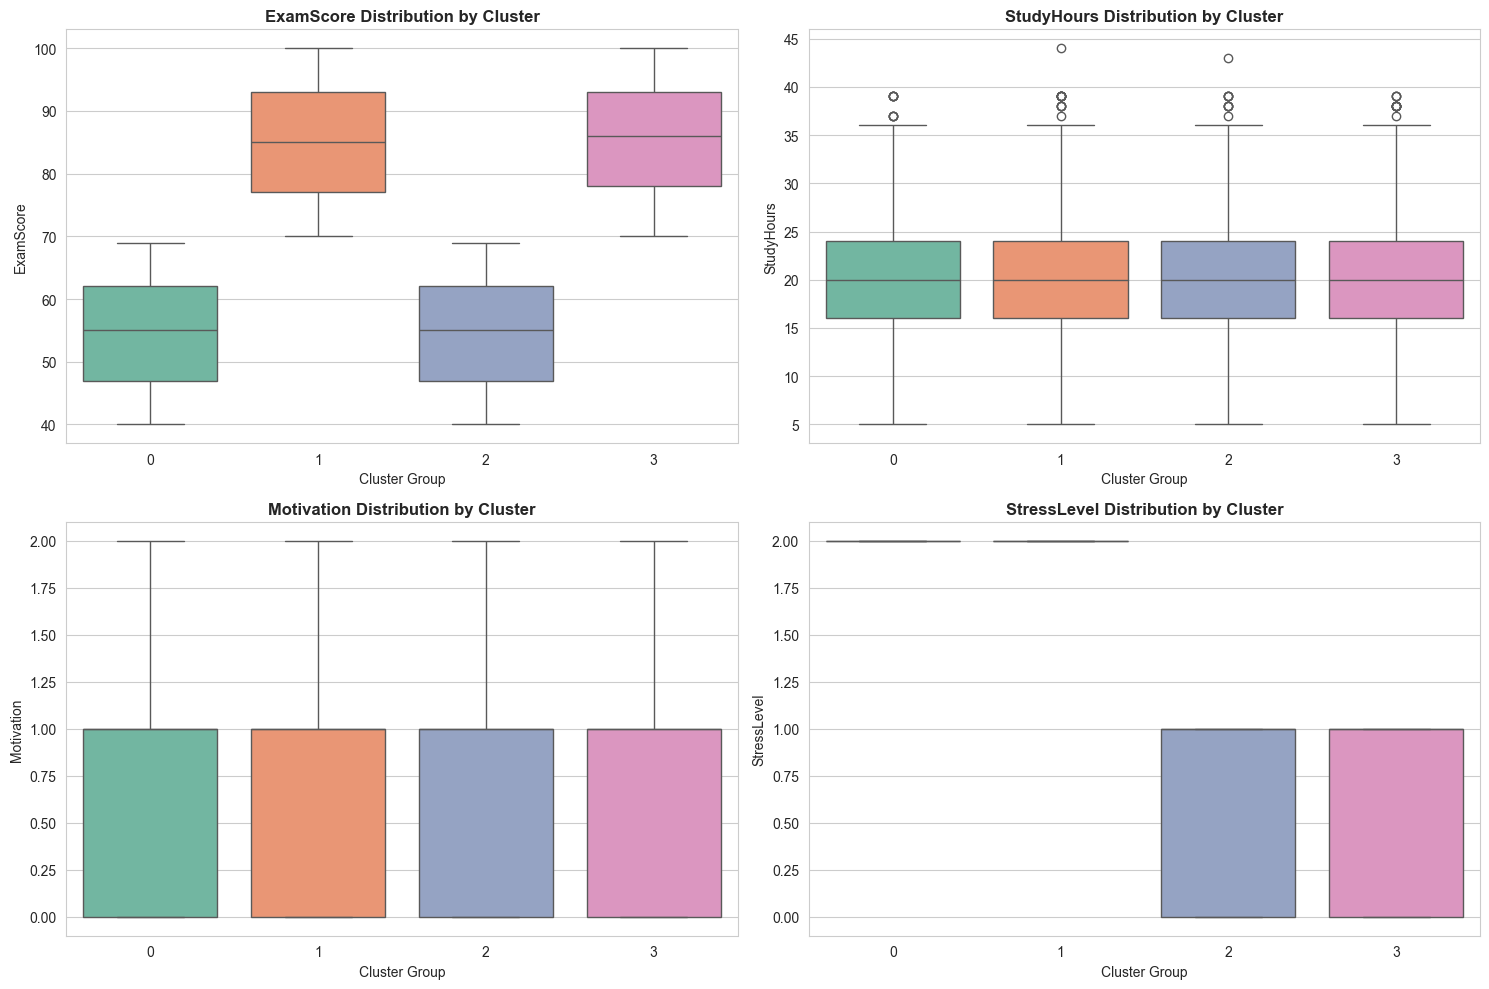


💡 RECOMMENDED INTERVENTIONS BY CLUSTER:
Cluster 0 (AVERAGE PERFORMERS): Maintain: Continue current strategies, peer mentoring opportunities
Cluster 1 (AVERAGE PERFORMERS): Maintain: Continue current strategies, peer mentoring opportunities
Cluster 2 (AVERAGE PERFORMERS): Maintain: Continue current strategies, peer mentoring opportunities
Cluster 3 (AVERAGE PERFORMERS): Maintain: Continue current strategies, peer mentoring opportunities


In [61]:
# EXPERIMENT 3: Identifying Student Risk Groups with Clustering
print("=" * 60)
print("EXPERIMENT 3: Discovering Student Patterns with Clustering")
print("=" * 60)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select features for clustering - focusing on behavior and performance
cluster_features = ['StudyHours', 'Attendance', 'Motivation', 'StressLevel', 
                    'AssignmentCompletion', 'ExamScore', 'FinalGrade']

print("Features for clustering:", cluster_features)
X_cluster = student_performance_df[cluster_features]

# Standardize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Find the optimal number of clusters using the Elbow Method
print("\n🔍 Finding optimal number of clusters...")
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster variance)')
plt.title('Elbow Method for Optimal Number of Clusters', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.savefig('elbow_method.png', dpi=150)
plt.show()

# Based on elbow plot, choose k=4 (you can adjust based on where the elbow bends)
optimal_k = 4
print(f"Choosing {optimal_k} clusters based on elbow method")

# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
student_performance_df['Cluster'] = clusters

# Analyze the clusters
print(f"\n📊 CLUSTER ANALYSIS (Student Risk Groups):")
print(f"Total students in each cluster:")
print(student_performance_df['Cluster'].value_counts().sort_index())

# Calculate mean values for each cluster
cluster_profiles = student_performance_df.groupby('Cluster')[cluster_features].mean()
print("\n📈 CLUSTER PROFILES (Average values):")
print(cluster_profiles.round(2))

# Visualize clusters using PCA (reduce to 2D for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6, s=30)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Student Clusters Visualized in 2D', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.savefig('student_clusters_2d.png', dpi=150)
plt.show()

# Create detailed cluster descriptions
print("\n🎯 INTERPRETING CLUSTERS (Student Risk Groups):")

cluster_descriptions = []
for cluster_id in range(optimal_k):
    cluster_data = student_performance_df[student_performance_df['Cluster'] == cluster_id]
    
    # Determine cluster characteristics
    avg_score = cluster_data['ExamScore'].mean()
    avg_study = cluster_data['StudyHours'].mean()
    avg_motivation = cluster_data['Motivation'].mean()
    avg_stress = cluster_data['StressLevel'].mean()
    
    # Create description based on patterns
    if avg_score > 75 and avg_motivation > 1.5:
        description = "HIGH PERFORMERS"
        risk_level = "Low Risk"
    elif avg_score < 60 and avg_study < 15:
        description = "AT-RISK: Low Effort"
        risk_level = "High Risk"
    elif avg_score < 60 and avg_study > 20:
        description = "STRUGGLING: High Effort, Low Results"
        risk_level = "Medium Risk"
    else:
        description = "AVERAGE PERFORMERS"
        risk_level = "Medium-Low Risk"
    
    cluster_descriptions.append({
        'cluster': cluster_id,
        'description': description,
        'risk_level': risk_level,
        'size': len(cluster_data),
        'avg_score': avg_score,
        'avg_study_hours': avg_study
    })
    
    print(f"\nCluster {cluster_id} ({risk_level}):")
    print(f"  - {description}")
    print(f"  - Students: {len(cluster_data)}")
    print(f"  - Avg Exam Score: {avg_score:.1f}")
    print(f"  - Avg Study Hours: {avg_study:.1f}")
    print(f"  - Avg Motivation: {avg_motivation:.1f}")
    print(f"  - Avg Stress: {avg_stress:.1f}")

# Analyze learning style distribution in each cluster
print("\n👥 LEARNING STYLES IN EACH CLUSTER:")
cluster_learning_styles = student_performance_df.groupby(['Cluster', 'LearningStyleName']).size().unstack(fill_value=0)
print(cluster_learning_styles)

# Visualize cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

key_metrics = ['ExamScore', 'StudyHours', 'Motivation', 'StressLevel']
for i, metric in enumerate(key_metrics):
    sns.boxplot(data=student_performance_df, x='Cluster', y=metric, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{metric} Distribution by Cluster', fontweight='bold')
    axes[i].set_xlabel('Cluster Group')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.savefig('cluster_characteristics.png', dpi=150)
plt.show()

# Recommend interventions based on clusters
print("\n💡 RECOMMENDED INTERVENTIONS BY CLUSTER:")
for desc in cluster_descriptions:
    cluster_id = desc['cluster']
    if desc['risk_level'] == "High Risk":
        intervention = "Urgent: Academic counseling, study skills workshop, motivation programs"
    elif desc['risk_level'] == "Medium Risk":
        intervention = "Targeted: Tutoring, stress management, learning style adaptation"
    else:
        intervention = "Maintain: Continue current strategies, peer mentoring opportunities"
    
    print(f"Cluster {cluster_id} ({desc['description']}): {intervention}")